#####   
# Optimization (Minimization) with scikit-opt
 - pip install scikit-opt==0.3.1

## Preparing Data

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
min f(x0, x1, x2) = x0^2 + x1^2 + x2^2
s.t.
    x0*x1 >= 1
    x0*x1 <= 5
    x1 + x2 = 1
    0 <= x0, x1, x2 <= 5
'''

# The Function To Be Minimized 
def obj_func(p):
    x0, x1, x2 = p
    return x0 ** 2 + x1 ** 2 + x2 ** 2

# The Constraints
constraint_ueq = [
      lambda x :  1 - x[0] * x[1]  # <= 0
    , lambda x :  x[0] * x[1] - 5  # <= 0  
    ]
constraint_eq  = [
      lambda x :  1 - x[1] - x[2]  #  = 0 
    ]

#####   
### GA (Genetic Algorithm)

 X  = [-0.00079351  0.00091558  0.00177013]
MIN =  4.60129518300049e-06


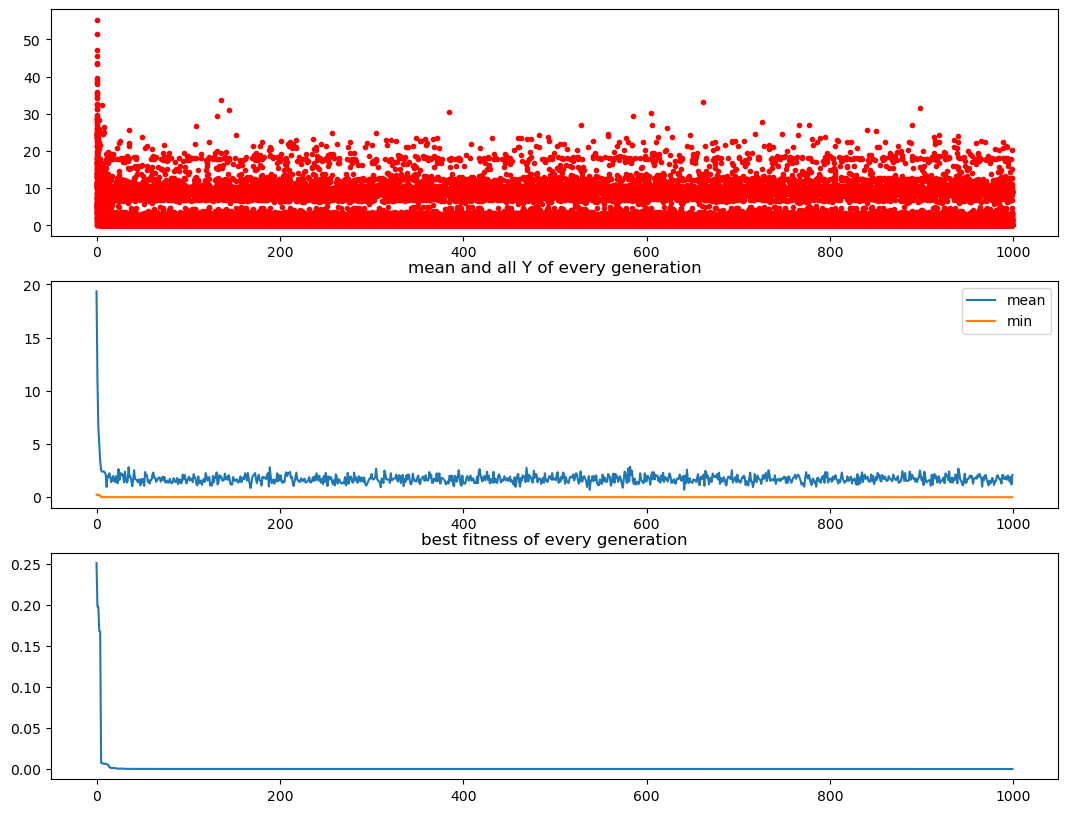

In [311]:
from sko.GA import GA
ga = GA( func      = obj_func
       , n_dim     = 3
       , size_pop  = 100
       , max_iter  = 1000
       , ub        = [+5, +5, +5]
       , lb        = [-2, -2, -2]
       , prob_mut  = 0.05
       , precision = 1e-3
       #, constraint_eq  = constraint_eq
       #, constraint_ueq = constraint_ueq
       )
Best_X, Best_y = ga.fit()

print( ' X  =' , Best_X )
print( 'MIN = ', Best_y ) 


Y_history  =  ga.all_history_Y
Y_history  =  pd.DataFrame( Y_history )

plt_mean   =  Y_history.mean( axis=1 )
plt_max    =  Y_history.min(  axis=1 )

fig, ax    =  plt.subplots( 3, 1, figsize=(13,10) )
ax[0].plot( Y_history.index, Y_history.values, '.', color='red' )

ax[1].plot( plt_mean.index, plt_mean, label='mean' )
ax[1].plot( plt_max.index,  plt_max,  label='min'  )
ax[1].set_title( 'mean and all Y of every generation' )
ax[1].legend()

ax[2].plot(plt_max.index, plt_max.cummin())
ax[2].set_title('best fitness of every generation')

plt.show()

#####   
### PSO (Particle Swarm Optimization)

 X  = [-2.03633211e-05  3.30591772e-04 -3.30324059e-04]
MIN =  2.1881956879333417e-07


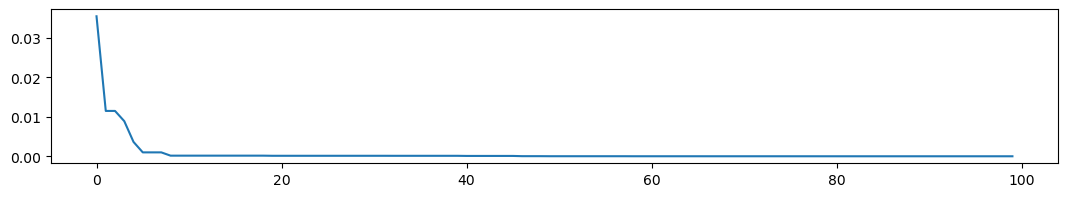

In [320]:
from sko.PSO import PSO
pso = PSO( func     = obj_func
         , dim      = 3
        ,  pop      = 500
         , max_iter = 100
         ).fit()

Best_X = pso.gbest_x
Best_y = pso.gbest_y

print(' X  =' , Best_X )
print('MIN = ', Best_y )

fig, ax = plt.subplots( figsize=(13,2) )
pso.plot_history()

#####   
### SA (Simulated Annealing)

 X  = [-0.00270261 -0.00172845  0.00139661]
MIN =  1.2242151577660558e-05


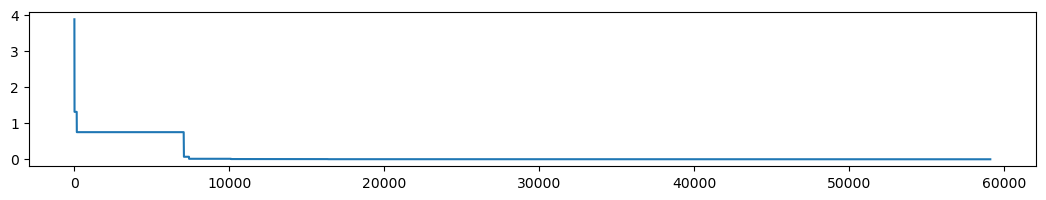

In [322]:
from sko.SA import SA

sa = SA( func  =  obj_func
       , x0    = [1, 1, 1] 
       , T     =    100    # float,  initial temperature
       , T_min =   1e-07   # float,  end temperature 
       , L     =    300    # float,  num of iteration under every temperature（Long of Chain）
       , q     =    0.9    # float,  cool down speed  
       )
Best_X, Best_y = sa.fit()

print( ' X  =' , Best_X )
print( 'MIN = ', Best_y ) 

fig, ax = plt.subplots( figsize=(13,2) )
plt.plot( pd.DataFrame(sa.f_list).cummin(axis=0) )
plt.show()

#####   
### AFSA (Artificial Fish Swarm Algorithm)

In [324]:
from sko.ASFA import ASFA as AFSA

afsa = AFSA( func        = obj_func,
             n_dim       = 3,
             size_pop    = 50,
             max_iter    = 300,
             max_try_num = 100,
             step        = 0.5,
             visual      = 0.3,
             q           = 0.98,
             delta       = 0.5  
           )
Best_X, _ = afsa.fit()
Best_y    = obj_func(Best_X)

print( ' X  =' , Best_X )
print( 'MIN = ', Best_y )

 X  = [-4.03556625e-05  1.19525541e-06 -1.45099662e-04]
MIN =  2.2683919902468677e-08


#
#
#
# Finding Shortest Path (TSP) with scikit-opt
 - pip install scikit-opt==0.3.1

## Preparing Data

In [292]:
num_points        = 20
points            = range(num_points)

points_coordinate = np.random.rand(num_points,2)
distance_matrix   = np.zeros(shape=(num_points, num_points))
for i in range(num_points):
    for j in range(num_points):
        distance_matrix[i][j] = np.linalg.norm(points_coordinate[i] - points_coordinate[j], ord=2)
print('distance_matrix is: \n', distance_matrix)

def cal_total_distance(points):
    num_points, = points.shape
    total_distance = 0
    for i in range(num_points - 1):
        total_distance += distance_matrix[points[i], points[i + 1]]
    total_distance += distance_matrix[points[i + 1], points[0]]
    return total_distance


distance_matrix is: 
 [[0.         0.64370961 0.65841679 0.41186668 0.52008996 0.74802419
  0.45992879 0.76777231 0.39296297 0.66539111 0.5294873  0.1293894
  0.64400807 0.35314301 0.68154127 0.70085393 0.2608756  0.1972953
  0.11736861 0.2737599 ]
 [0.64370961 0.         0.22139841 0.44266475 0.13947398 0.35984237
  0.18797111 0.49549235 0.45605167 0.56401741 0.40030518 0.7689762
  0.5157705  0.35158955 0.21472029 0.37193952 0.47711469 0.6970165
  0.52675432 0.50888027]
 [0.65841679 0.22139841 0.         0.32478422 0.19250973 0.58089439
  0.30074697 0.71334041 0.60119836 0.7644824  0.23224199 0.78758611
  0.71667399 0.46999796 0.02689508 0.58955065 0.42558268 0.6462546
  0.55314624 0.61453504]
 [0.41186668 0.44266475 0.32478422 0.         0.30986973 0.73189642
  0.35122302 0.82491539 0.55655191 0.80642881 0.12343605 0.53035237
  0.7655583  0.4246475  0.35167532 0.71319875 0.15156402 0.33757235
  0.34330456 0.50302677]
 [0.52008996 0.13947398 0.19250973 0.30986973 0.         0.44013934

#####   
### GA_TSP (Genetic Algorithm TSP)

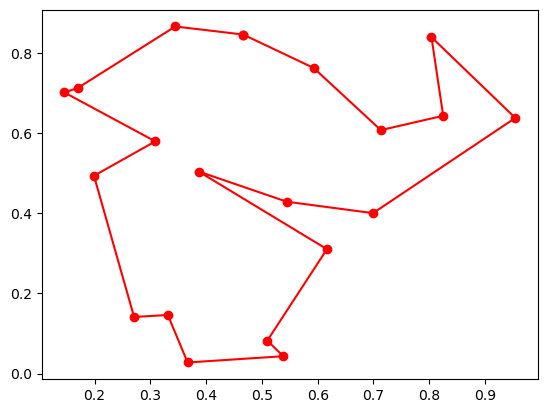

best_distance = 3.6382524237113674


In [293]:
from sko.GA import GA_TSP

ga_tsp = GA_TSP( func     = cal_total_distance, 
                 points   = points, 
                 pop      = 200*num_points, 
                 max_iter = 2500, 
                 Pm       = 0.95, 
                 n_dim    = num_points
               )
best_points, best_distance = ga_tsp.fit()

# Plotting
fig, ax = plt.subplots(1, 1)
best_points_           = np.concatenate(  [ best_points , [best_points[0]]  ])
best_points_coordinate = points_coordinate[ best_points_,       :           ]
ax.plot( best_points_coordinate[:,0], best_points_coordinate[:,1], 'o-r' )  
plt.show()

# best distance
print( 'best_distance =', best_distance )

#####   
### SA_TSP (Simulated Annealing TSP)

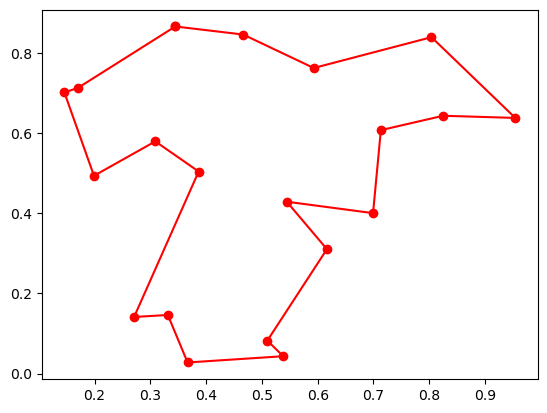

best_distance = 3.261439880567904


In [294]:
from sko.SA import SA_TSP

sa_tsp = SA_TSP( func  = cal_total_distance,   # The function you want to do optimal                
                 x0    = range(num_points),    # array,  shape is n_dim,  initial solution
                 T     = 10 * num_points,      # float,  initial temperature
                 T_min = 1e-07,                # float,    end   temperature
                 L     = 10 * num_points,      # float,  num of iteration under every temperature（Long of Chain）
                 q     = 0.995                 # float,  cool down speed
               )
best_points, best_distance = sa_tsp.fit()

# Plotting
fig, ax = plt.subplots(1, 1)
best_points_           = np.concatenate(  [ best_points , [best_points[0]]  ])
best_points_coordinate = points_coordinate[ best_points_,       :           ]
ax.plot( best_points_coordinate[:,0], best_points_coordinate[:,1], 'o-r' )  
plt.show()

# best distance
print( 'best_distance =', best_distance )

#####   
### ACA_TSP (Ant Colony Algorithm TSP)

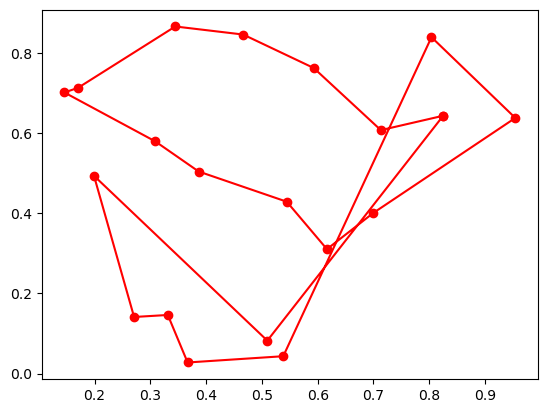

best_distance = 3.260505309519559


In [295]:
from sko.ACA import ACA_TSP

aca = ACA_TSP( func     = cal_total_distance,
               n_dim    = num_points,
               size_pop = 10 * num_points,  
               max_iter = 200,
               distance_matrix = distance_matrix
             )
best_points, best_distance = aca.fit()

# Plotting
fig, ax = plt.subplots(1, 1)
best_points_           = np.concatenate(  [ best_points , [best_points[0]]  ])
best_points_coordinate = points_coordinate[ best_points_,       :           ]
ax.plot( best_points_coordinate[:,0], best_points_coordinate[:,1], 'o-r' )  
plt.show()

# best distance
print( 'best_distance =', best_distance )

#####   
### IA_TSP ( Immune Algorithm TSP)

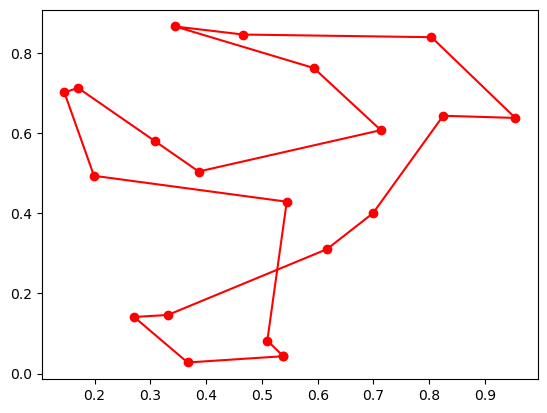

best_distance = 4.0472992102549705


In [296]:
from sko.IA import IA_TSP_g as IA_TSP

ia_tsp = IA_TSP( func     = cal_total_distance, 
                 n_dim    = num_points, 
                 pop      = num_points * 20, 
                 max_iter = 3000,
                 Pm       = 0.95,
                 T        = 0.90,
                 alpha    = 0.95
               )
best_points, best_distance = ia_tsp.fit()

# Plotting
fig, ax = plt.subplots(1, 1)
best_points_           = np.concatenate(  [ best_points , [best_points[0]]  ])
best_points_coordinate = points_coordinate[ best_points_,       :           ]
ax.plot( best_points_coordinate[:,0], best_points_coordinate[:,1], 'o-r' )  
plt.show()

# best distance
print( 'best_distance =', best_distance )

#####   

#####   

#####   
# Finding Shortest Path (TSP) with PuLP

In [1]:
city_coords = {
    0: (2, 3),
    1: (3, 5),
    2: (5, 4),
    3: (7, 5),
    4: (9, 1),
    5: (8, 3),
    6: (6, 2),
    7: (4, 2),
    8: (2, 1),
    9: (1, 4)
}

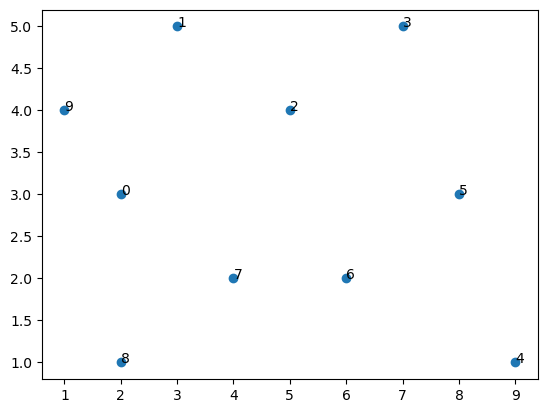

In [2]:
import matplotlib.pyplot as plt 

# Define the number of cities
num_cities = len(city_coords)

# Plot the cities on a 2D plane
x_coords = [city_coords[i][0] for i in range(num_cities)]
y_coords = [city_coords[i][1] for i in range(num_cities)]
plt.scatter(x_coords, y_coords)


for i in range(num_cities):
    plt.annotate(str(i), (city_coords[i][0], city_coords[i][1]))
plt.show()

In [3]:
import pulp
import itertools 
import math

def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) 

# Define the TSP problem
prob = pulp.LpProblem("TSP", pulp.LpMinimize)

# Define the binary decision variables
x = pulp.LpVariable.dicts("x", [(i, j) for i in city_coords for j in city_coords if i != j], cat='Binary') 

# Define the objective function
prob += pulp.lpSum([distance(city_coords[i], city_coords[j]) * x[(i, j)] for i in city_coords for j in city_coords if i != j])

# Define the constraints
# Each city must be visited exactly once
for i in city_coords:
    prob += pulp.lpSum([x[(i, j)] for j in city_coords if i != j]) == 1
    prob += pulp.lpSum([x[(j, i)] for j in city_coords if i != j]) == 1

# Subtour elimination constraints
for k in city_coords:
    for S in range(2, len(city_coords)):
        for subset in itertools.combinations([i for i in city_coords if i != k], S):
            prob += pulp.lpSum([x[(i, j)] for i in subset for j in subset if i != j]) <= len(subset) - 1

In [4]:
# Solve the problem using the CBC solver
prob.solve(pulp.PULP_CBC_CMD())

# Print the status of the solution
print("Status:", pulp.LpStatus[prob.status])

# Print the optimal objective value
print("Total distance traveled:", pulp.value(prob.objective)) 

Status: Optimal
Total distance traveled: 21.992899087540213


Route:
0 -> 9
9 -> 1
1 -> 2
2 -> 3
3 -> 5
5 -> 4
4 -> 6
6 -> 7
7 -> 8
8 -> 0


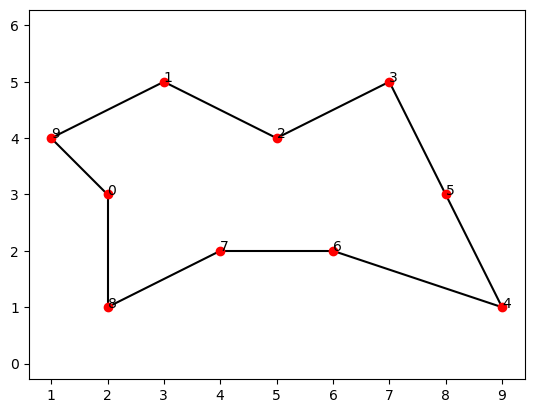

In [5]:
# Extract the solution 
solution = []
start_city = 0
next_city = start_city
while True:
    for j in range(num_cities):
        if j != next_city and x[(next_city, j)].value() == 1:
            solution.append((next_city, j))
            next_city = j
            break
    if next_city == start_city:
        break

# Print the solution
print("Route:")
for i in range(len(solution)):
    print(str(solution[i][0]) + " -> " + str(solution[i][1]))

# Plot the solution on a 2D plane
for i in range(len(solution)):
    plt.plot([city_coords[solution[i][0]][0], city_coords[solution[i][1]][0]], [city_coords[solution[i][0]][1], city_coords[solution[i][1]][1]], 'k-')
for i in range(num_cities):
    plt.plot(city_coords[i][0], city_coords[i][1], 'ro')

    plt.annotate(str(i), (city_coords[i][0], city_coords[i][1]))
plt.axis('equal')
plt.show()